In [19]:
# !pip install -r requirements.txt
# !pip install nbformat

In [20]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

In [21]:
df = pd.read_csv('GME.csv')

#We do not need the following columns:
df = df.drop(columns = ['Open','Close','High', 'Low', 'Volume'])
df

,Date,Adj Close
0,2021-01-04,4.312500
1,2021-01-05,4.342500
2,2021-01-06,4.590000
3,2021-01-07,4.520000
4,2021-01-08,4.422500
...,...,...
670,2023-09-01,18.420000
671,2023-09-05,19.230000
672,2023-09-06,18.750000
673,2023-09-07,18.889999


In [22]:
# A graph of date vs price:
fig = px.line(df, x = 'Date', y = 'Adj Close')
fig.show()

In [23]:
df = df.set_index('Date')

In [24]:
df.shape

(675, 1)

In [25]:
#We are going to use 135 out of the 675 data points, approx 20% is test data
train = df.iloc[:-135]
test = df.iloc[-135:]

In [26]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 2021-01-04 to 2023-02-24
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  540 non-null    float64
dtypes: float64(1)
memory usage: 8.4+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 2023-02-27 to 2023-09-08
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  135 non-null    float64
dtypes: float64(1)
memory usage: 2.1+ KB


In [27]:
train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

In [28]:
model = SimpleExpSmoothing(np.asarray(train['Adj Close']))
model.index = pd.to_datetime(train.index)

In [29]:
#smoothing level determines how much weight is given to older data points
fit1 = model.fit(smoothing_level = .3, optimized=False)
pred1 = fit1.forecast(135)

fit2 = model.fit(smoothing_level = .2, optimized=False)
pred2 = fit2.forecast(135)

fit3 = model.fit(smoothing_level = .5, optimized=False)
pred3 = fit3.forecast(135)


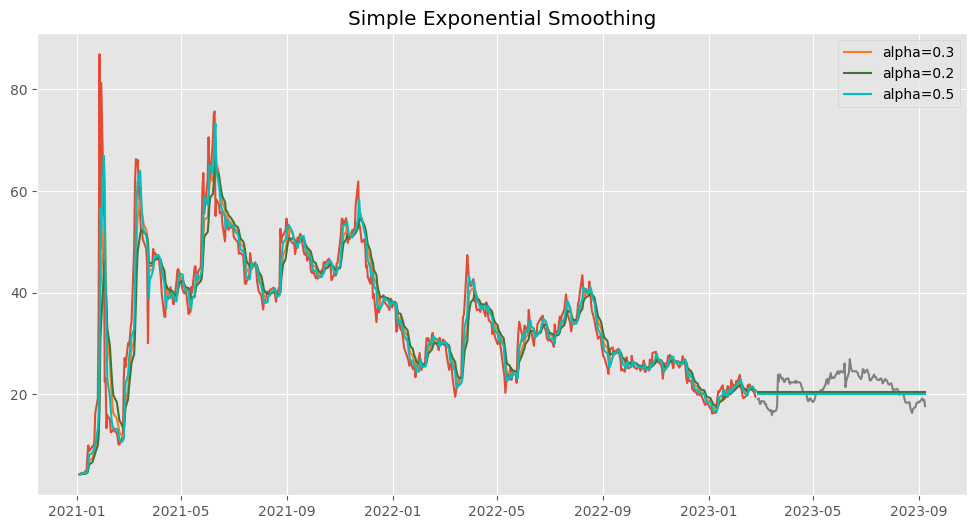

In [30]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(train.index[:], train.values[:])
ax.plot(test.index, test.values, color = "gray")

for predicts, fits, colors in zip((pred1, pred2, pred3), (fit1, fit2, fit3), ('#ff7823', '#3c763d', 'c')):
    ax.plot(train.index[:], fits.fittedvalues[:], color = colors)
    ax.plot(test.index, predicts, label = "alpha=" + str(fits.params['smoothing_level'])[:3], color = colors)

plt.title("Simple Exponential Smoothing")
plt.legend();